In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing Required Libraries:

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
import spacy
import re
from tqdm import tqdm
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

In [5]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

### Importing Data:

In [6]:
pd.set_option('display.max_colwidth',None)
true_news=pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
fake_news=pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
print("The shape of True News is: ",true_news.shape)
print("The shape of Fake News is: ",fake_news.shape)

The shape of True News is:  (21417, 4)
The shape of Fake News is:  (23481, 4)


In [7]:
print(true_news.columns)
print(fake_news.columns)

Index(['title', 'text', 'subject', 'date'], dtype='object')
Index(['title', 'text', 'subject', 'date'], dtype='object')


In [8]:
# Creating a column named 'trueorfake', true news are given as label '1' 
# and fake news are given as label '0'
true_news['trueorfake']=1

In [9]:
fake_news['trueorfake']=0

In [10]:
countvect=CountVectorizer()
tfidfvect=TfidfVectorizer()
porterstemmer=PorterStemmer()
snowballstemmer=SnowballStemmer('english')
lemmatizer=WordNetLemmatizer()

In [11]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       21417 non-null  object
 1   text        21417 non-null  object
 2   subject     21417 non-null  object
 3   date        21417 non-null  object
 4   trueorfake  21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [12]:
true_news.isnull().sum()

title         0
text          0
subject       0
date          0
trueorfake    0
dtype: int64

In [13]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       23481 non-null  object
 1   text        23481 non-null  object
 2   subject     23481 non-null  object
 3   date        23481 non-null  object
 4   trueorfake  23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [14]:
fake_news.isnull().sum()

title         0
text          0
subject       0
date          0
trueorfake    0
dtype: int64

In [15]:
# Concatenating True and Fake news dataframes and forming a new dataframe named 'news'
news=pd.concat([true_news,fake_news],axis=0)

In [16]:
true_news.head(1)

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [17]:
fake_news.head(1)

,title,text,subject,date,trueorfake
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,"December 31, 2017",0


In [18]:
news.head(1)

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [19]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44898 non-null  object
 1   text        44898 non-null  object
 2   subject     44898 non-null  object
 3   date        44898 non-null  object
 4   trueorfake  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


### Exploratory Data Analysis:

In [84]:
# Checking for dataset balance by counting number of true labels and fake labels
news['trueorfake'].value_counts(normalize=True)

0    0.516208
1    0.483792
Name: trueorfake, dtype: float64

- From the above, we can see that the dataset is pretty balanced. So there would be no biasness in the models.

Text(0.5, 1.0, 'News Subject Types')

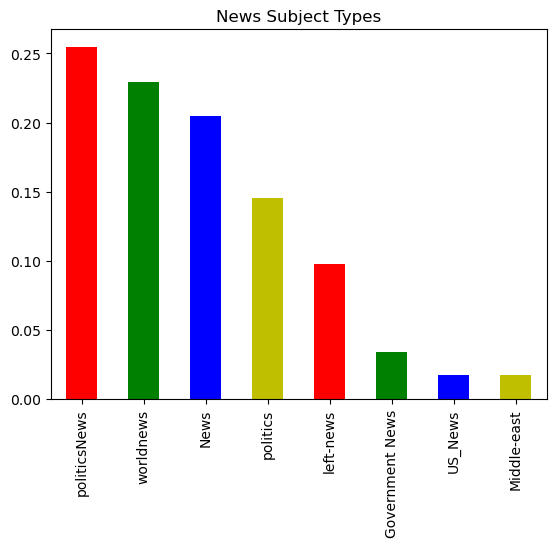

In [95]:
news['subject'].value_counts(normalize=True).plot(kind='bar',color=['r','g','b','y'])
plt.title('News Subject Types')

- The category 'politicsNews' contributes to the majority of news articles amounting to 25%.
- The category 'worldnews' stands next to that.

Text(0.5, 1.0, 'Subject Types in True News')

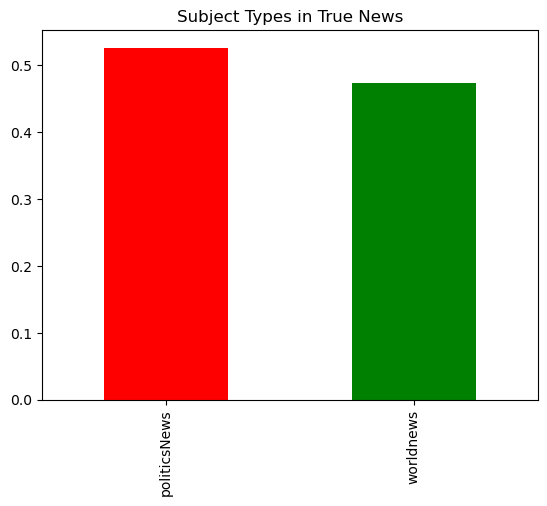

In [96]:
true_news['subject'].value_counts(normalize=True).plot(kind='bar',color=['r','g','b','y'])
plt.title('Subject Types in True News')

- Only two subject categories constitute 'True News'. Those are:\
1) politicsNews\
2) worldnews

Text(0.5, 1.0, 'Subject Types in Fake News')

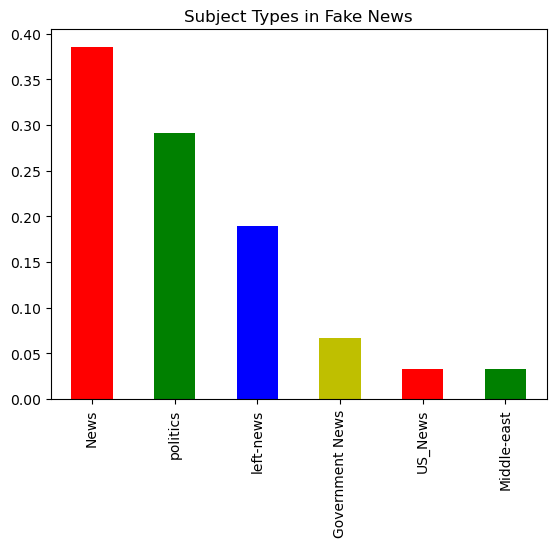

In [97]:
fake_news['subject'].value_counts(normalize=True).plot(kind='bar',color=['r','g','b','y'])
plt.title('Subject Types in Fake News')

- 'News' is the dominant subject category of 'Fake News' articles.
- Next to that is 'politics' subject category.

### Data Cleaning:

- Some cells in 'text' column are empty and they are filled with either a single space or a double space. So we'll drop those rows.

In [20]:
# deleting rows in text column which contains  ' ' <double space> and ' ' <single space>
news=news[news.text!=' ']
news=news[news.text!='  ']
news.reset_index(drop=True,inplace=True)

- 'Preprocess' function does following:
* First the document is converted to lower case.
* The special characters such as '@#!$()[]' might be attached with the words making tokenization of words improper. To avoid that these special characters are separated by spaces from words using re.sub()
* word_tokenize function is used to tokenize the sentences.
* WordNetLemmatizer() is used instead of PortNetStemmer and SnowballStemmer. Since stemmers are not properly stemming the words.
* Finally after performing all above operations, the tokenized words are joined and returned as a document

In [21]:
def preprocess(document):
    document=document.lower()
    document=re.sub(r'([@$!#()[]])',r' \1 ',document)
    words=word_tokenize(document)
    words=[lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    document=" ".join(words)
    return document

#### Performing Preprocess operation on individual cells of 'text' column

In [22]:
docu=[] # an empty list named 'docu' is assigned to store results
for i in tqdm(range(len(news.text)), desc='Pre Processing Text'):
    processed=preprocess(news.text[i])
    docu.append(processed)

Pre Processing Text: 100%|██████████| 44267/44267 [45:37<00:00, 16.17it/s]  


- During preprocessing operation, its been found that row number 36487 of 'text' column has only stop words in it. Thus pre processing operation of that corresponding cell shows result as '!' which cannot be vectorized using TFIDF.
- Thus we are going to delete that row.

In [28]:
news.text[36487]

'I VE HAD IT! '

In [32]:
filtered_doc=[doc for doc in docu if len(doc)>1]

In [33]:
len(filtered_doc)

44266

In [48]:
# Dropping 36487 row of news dataframe
news1=news.drop(36487)
news1.shape

(44266, 5)

In [49]:
# assigning pre processed results to a column named 'preprocessed_document'
news1['preprocessed_document']=filtered_doc

### WordCloud of preprocessed DataFrame:

(-0.5, 1199.5, 799.5, -0.5)

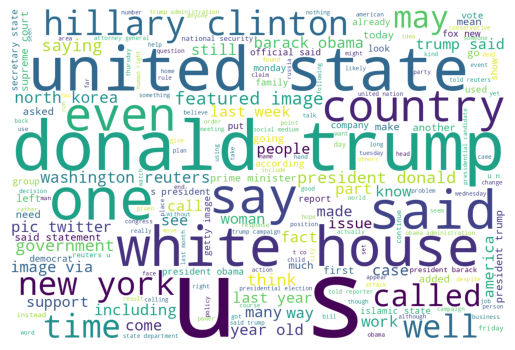

In [100]:
words=" ".join(filtered_doc)
wordcloud=WordCloud(width=1200, height=800, background_color='white').generate(words)
plt.imshow(wordcloud)
plt.axis('off')

### Train Test Splitting Data:

In [51]:
X_train, X_test, y_train, y_test = train_test_split(news1['preprocessed_document'],news1['trueorfake'],train_size=0.7,random_state=42)

### TF-IDF vectorization of Train and Test Dataset:

- Fitting and Transformation is applied on the X_train
- Only Transformation is applied on the X_test

In [53]:
X_train_tfidf=tfidfvect.fit_transform(X_train)
X_test_tfidf=tfidfvect.transform(X_test)

### Logistic Regression Model:

In [54]:
model=LogisticRegression()

In [60]:
lm=model.fit(X_train_tfidf,y_train)

In [61]:
y_pred=lm.predict(X_test_tfidf)

In [73]:
print('The Accuracy score of Logistic Regression Model on Fake News Recognition is: ',round(accuracy_score(y_test,y_pred)*100,2),"%")
print('The Precision score of Logistic Regression Model on Fake News Recognition is: ',round(precision_score(y_test,y_pred)*100,2),"%")
print('The Recall score of Logistic Regression Model on Fake News Recognition is: ',round(recall_score(y_test,y_pred)*100,2),"%")
print('The F1 score of Logistic Regression Model on Fake News Recognition is: ',round(f1_score(y_test,y_pred)*100,2),"%")

The Accuracy score of Logistic Regression Model on Fake News Recognition is:  99.01 %
The Precision score of Logistic Regression Model on Fake News Recognition is:  98.75 %
The Recall score of Logistic Regression Model on Fake News Recognition is:  99.21 %
The F1 score of Logistic Regression Model on Fake News Recognition is:  98.98 %


In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6849
           1       0.99      0.99      0.99      6431

    accuracy                           0.99     13280
   macro avg       0.99      0.99      0.99     13280
weighted avg       0.99      0.99      0.99     13280



### Decision Tree Classifier:

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model1=DecisionTreeClassifier(random_state=42)

In [80]:
dt=model1.fit(X_train_tfidf,y_train)
y_pred_dt=dt.predict(X_test_tfidf)

In [81]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6849
           1       1.00      1.00      1.00      6431

    accuracy                           1.00     13280
   macro avg       1.00      1.00      1.00     13280
weighted avg       1.00      1.00      1.00     13280



- Both Logistic Regression and Decision Tree Classifier models are performing exceptionally well on the test and train dataset.
- Both models can be used for fake news detection.

In [83]:
#X_train_tfidf=[]
#for document in tqdm(filtered_doc, desc='Calculating TF-IDF'):
 #   docuvec=tfidfvect.fit_transform([document])
  #  vect.append(docuvec.toarray()[0])